# **Title of project: Bank Customer Churn Model**


# **Objective**

The objective of the project is to develop a predictive model that can accurately identify and predict which customers are likely to churn (leave) the bank's services.

# **Data Source**

Bank Customer Churn
(https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv)
13 columns, 10,000 rows


◉ CustomerId: Contains random values and has no effect on customer leaving the bank.

◉ Surname: The surname of a customer has no impact on their decision to leave the bank.

◉ CreditScore: Can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

◉ Geography: A customer’s location can affect their decision to leave the bank.

◉ Gender: It’s interesting to explore whether gender plays a role in a customer leaving the bank.

◉ Age: This is certainly relevant, since older customers are less likely to leave their bank than younger ones.

◉ Tenure: Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

◉ Balance: Also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

◉ Num Of Products: Refers to the number of products that a customer has purchased through the bank.

◉ Has Credit Card: Denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

◉ Is Active Member: Active customers are less likely to leave the bank.

◉ Estimated Salary: As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

◉ Churn: Whether or not the customer left the bank.


# **Import  Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [2]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Analyze Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
df.duplicated('CustomerId').sum()

0

In [5]:
df = df.set_index('CustomerId')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# **Encoding**

In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [7]:
df.replace({'Geography' : {'France' : 0, 'Germany' : 1, 'Spain' : 2}}, inplace=True)

In [8]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
df.replace({'Gender' : {'Male' : 0, 'Female' : 1}}, inplace=True)

In [10]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [11]:
df.replace({'Num Of Products' : {1 : 0, 2 : 1, 3 : 1, 4: 1}}, inplace=True)

In [12]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn'],
      dtype='object')

In [13]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [14]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

# **Feature Engineering**

In [15]:
df.loc[(df['Balance'] == 0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [16]:
df['Zero_Balance'] = np.where(df['Balance'] > 0, 1, 0)

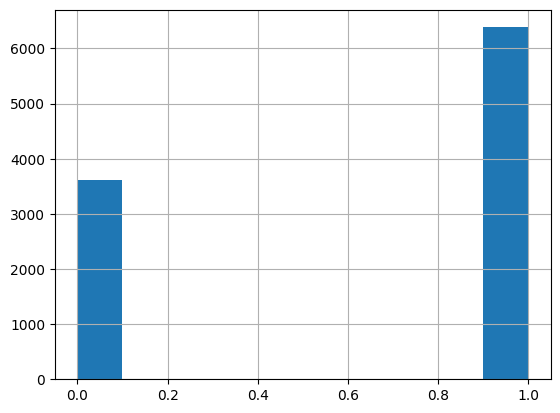

In [17]:
df['Zero_Balance'].hist()
plt.show()

In [18]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             4204         4204    4204  4204    4204     4204   
      1             1695         1695    1695  1695    1695     1695   
      2             2064         2064    2064  2064    2064     2064   
1     0              810          810     810   810     810      810   
      1              814          814     814   814     814      814   
      2              413          413     413   413     413      413   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     4204             4204              4204   
      1                     1695             1695              1695   
      2                     2064             2064              2064   
1     0                      810              810               810   
      1                      814              814               814   
      2                      413              413               413   

                 Estimated Salary  Zero_Balance  
Churn Geography                                  
0     0                      4204          4204  
      1                      1695          1695  
      2                      2064          2064  
1     0                       810           810  
      1                       814           814  
      2                       413           413

# **Define Label and Features**

In [19]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero_Balance'],
      dtype='object')

In [20]:
X = df.drop(['Surname', 'Churn'], axis=1)
Y = df['Churn']

In [21]:
X.shape, Y.shape

((10000, 11), (10000,))

# **Handling Imbalance Data**

Class Imbalance is a common problem in machine learning, especially in classification problems as machine learning algorithms are designed to maximize accuracy and reduce errors. If the data set is imbalance then in such cases, just by predicting the majority class we get a pretty high accuracy, but fails to capture the minority class.

1) Undersampling

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

Undersampling can be a good choice when you have a ton of data-think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.


2) Oversampling

Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don't have a ton of data to work with.

The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfiting.


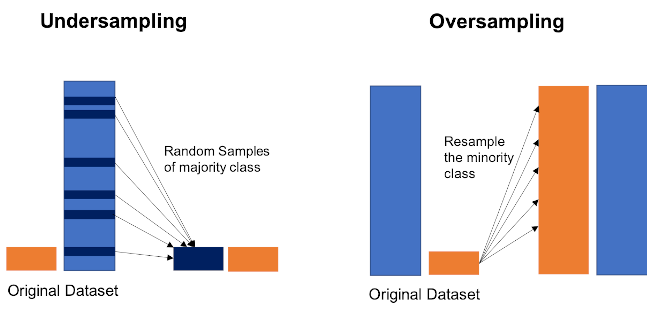

In [22]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

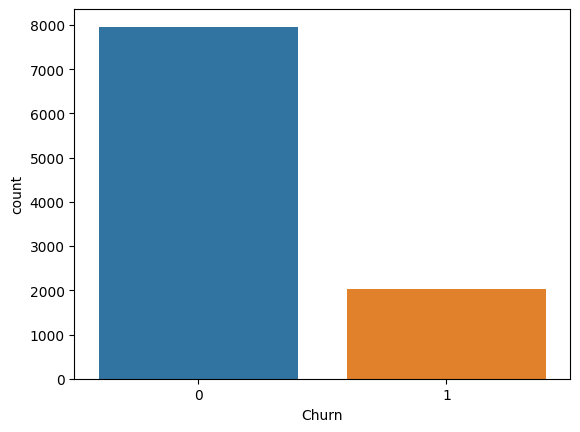

In [23]:
sns.countplot(x='Churn', data=df)
plt.show()

# **Random Undersampling**

In [24]:
from imblearn.under_sampling import RandomUnderSampler

In [25]:
rus = RandomUnderSampler(random_state=256)
X_rus, Y_rus = rus.fit_resample(X, Y)

In [26]:
X_rus.shape, Y_rus.shape, X.shape, Y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [27]:
Y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [28]:
Y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

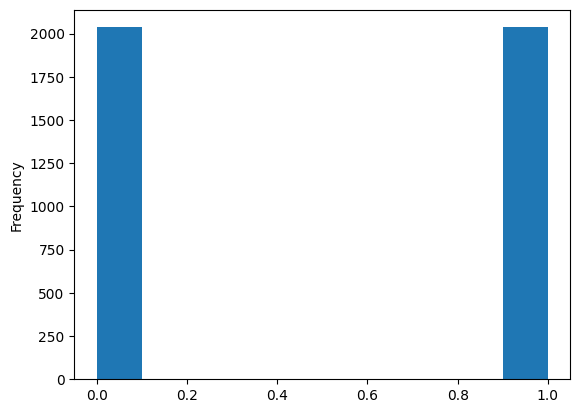

In [29]:
Y_rus.plot(kind='hist')
plt.show()

# **Random Oversampling**

In [30]:
from imblearn.over_sampling import RandomOverSampler

In [31]:
ros = RandomOverSampler(random_state=256)
X_ros, Y_ros = ros.fit_resample(X, Y)

In [32]:
X_ros.shape, Y_ros.shape, X.shape, Y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [33]:
Y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [34]:
Y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

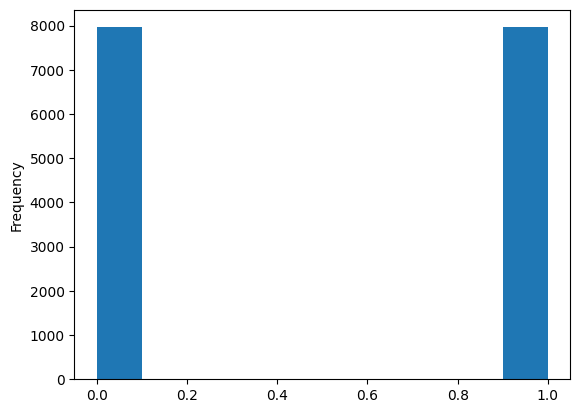

In [35]:
Y_ros.plot(kind='hist')
plt.show()

# **Train Test Split**

In [36]:
from sklearn.model_selection import train_test_split

# **Split Original Data**

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=256)

# **Split Random Undersampled Data**

In [38]:
X_train_rus, X_test_rus, Y_train_rus, Y_test_rus = train_test_split(X_rus, Y_rus, test_size=0.3, random_state=256)

# **Split Random Oversampled Data**

In [39]:
X_train_ros, X_test_ros, Y_train_ros, Y_test_ros = train_test_split(X_ros, Y_ros, test_size=0.3, random_state=256)

# **Standardize Features**

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()

# **Standardize Original Data**

In [42]:
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

# **Standardize Random Undersampled Data**

In [43]:
X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

# **Standardize Random Oversampled Data**

In [44]:
X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

# **Support Vector Machine Classifier**

In [45]:
from sklearn.svm import SVC

In [46]:
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [47]:
y_pred = svc.predict(X_test)

# **Model Accuracy**

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Confusion Matrix:
 [[2322   49]
 [ 461  168]]


In [50]:
print("Classification Report:\n", classification_report(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      2371
           1       0.77      0.27      0.40       629

    accuracy                           0.83      3000
   macro avg       0.80      0.62      0.65      3000
weighted avg       0.82      0.83      0.80      3000



# **Hyperparameter Tuning**

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param_grid = {'C' : [0.1, 1, 10],
              'gamma' : [1, 0.1, 0.01],
              'kernel' : ['rbf'],
              'class_weight' : ['balanced']}

In [53]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=2)
grid.fit(X_train, Y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [54]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [55]:
grid_predictions = grid.predict(X_test)

In [56]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, grid_predictions))

Confusion Matrix:
 [[2139  232]
 [ 418  211]]


In [57]:
print("Classification Report:\n", classification_report(Y_test, grid_predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      2371
           1       0.48      0.34      0.39       629

    accuracy                           0.78      3000
   macro avg       0.66      0.62      0.63      3000
weighted avg       0.76      0.78      0.77      3000



# **Model with Random Under Sampling**


In [58]:
svc_rus = SVC()
svc_rus.fit(X_train_rus, Y_train_rus)

SVC()

In [59]:
y_pred_rus = svc_rus.predict(X_test_rus)

# **Model Accuracy**

In [60]:
print(confusion_matrix(Y_test_rus, y_pred_rus))

[[456 172]
 [168 427]]


In [61]:
print(classification_report(Y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       628
           1       0.71      0.72      0.72       595

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223



# **Hyperparameter Tuning**

In [62]:
param_grid = {'C' : [0.1, 1, 10],
              'gamma' : [1, 0.1, 0.01],
              'kernel': ['rbf'],
              'class_weight': ['balanced']}

In [63]:
grid_rus = GridSearchCV(SVC(), param_grid, verbose=2, cv=2)
grid_rus.fit(X_train_rus, Y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [64]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [65]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [66]:
print("Confusion Matrix:\n", confusion_matrix(Y_test_rus, grid_predictions_rus))

Confusion Matrix:
 [[463 165]
 [169 426]]


In [67]:
print("Classification Report:\n", classification_report(Y_test_rus, grid_predictions_rus))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73       628
           1       0.72      0.72      0.72       595

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



# **Model with Random Over Sampling**

In [68]:
svc_ros = SVC()
svc_ros.fit(X_train_ros, Y_train_ros)

SVC()

In [69]:
y_pred_ros = svc_ros.predict(X_test_ros)

# Model Accuracy

In [70]:
print(confusion_matrix(Y_test_ros, y_pred_ros))

[[1801  574]
 [ 568 1835]]


In [71]:
print(classification_report(Y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2375
           1       0.76      0.76      0.76      2403

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.76      0.76      0.76      4778



# **Hyperparameter Tuning**

In [72]:
param_grid = {'C' : [0.1, 1, 10],
              'gamma' : [1, 0.1, 0.01],
              'kernel': ['rbf'],
              'class_weight': ['balanced']}

In [73]:
grid_ros = GridSearchCV(SVC(), param_grid, verbose=2, cv=2)
grid_ros.fit(X_train_ros, Y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   6.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   6.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [74]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [75]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [76]:
print("Confusion Matrix:\n", confusion_matrix(Y_test_ros, grid_predictions_ros))

Confusion Matrix:
 [[2026  349]
 [  90 2313]]


In [77]:
print("Classification Report:\n", classification_report(Y_test_ros, grid_predictions_ros))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      2375
           1       0.87      0.96      0.91      2403

    accuracy                           0.91      4778
   macro avg       0.91      0.91      0.91      4778
weighted avg       0.91      0.91      0.91      4778



# **Conclusion**

Finally, Using Random Over Sampling technique with Random Forest Classifier Model [Fine Tuned] has achieved a highest accuracy of 91%